In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [2]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_gbnsr6.pkl', 'rb')     
gbnsr6 = pickle.load(dbfile)
dbfile.close()

In [3]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_mmpbsa.pkl', 'rb')     
mmpbsa = pickle.load(dbfile)
dbfile.close()

In [4]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_mmgbsa.pkl', 'rb')     
mmgbsa_5 = pickle.load(dbfile)
dbfile.close()

In [5]:
dbfile = open('all4_mmgbsa_igb_2.pkl', 'rb')     
mmgbsa_2 = pickle.load(dbfile)
dbfile.close()

In [6]:
gbnsr6_time = pickle.load(open('gbnsr6_frame_times.pkl', 'rb'))
mmgbsa_time = pickle.load(open('mmgbsa_frame_times.pkl', 'rb'))
mmpbsa_time = pickle.load(open('mmpbsa_frame_times.pkl', 'rb'))

In [7]:
for i in range(len(gbnsr6)):
    gbnsr6[i]['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] = gbnsr6[i]['complex_EGB'] - \
        (gbnsr6[i]['receptor_EGB'] + gbnsr6[i]['ligand_EGB'])

In [8]:
colm = 'Differences (Complex - Receptor - Ligand)_DELTA TOTAL'

# TODO
## add igb 2

slide 11 and 12 like 7
Time (seconds)
MMGBSA igb 66

igb 2 : , color='#e3be2b'
igb 5 : , color='#752262'
pb : , color='#de2209'
gbnsr6 : , color='#878505'

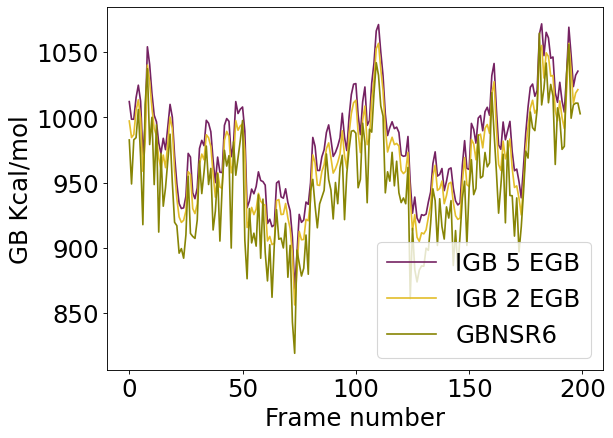

In [12]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_5], label='IGB 5 EGB', color='#752262')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_2], label='IGB 2 EGB', color='#e3be2b')
plt.plot([x[colm] for x in gbnsr6], label='GBNSR6', color='#878505')
plt.xlabel('Frame number')
plt.ylabel('GB Kcal/mol')
plt.legend()

In [ ]:
## RMSE
gbnsr6_rmse = []

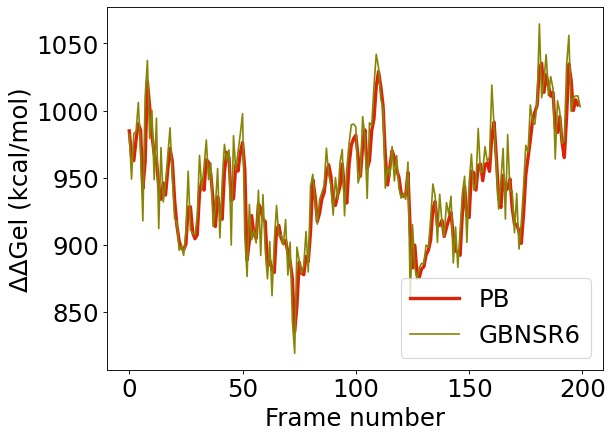

In [19]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='PB', color='#de2209', linewidth=3)
plt.plot([x[colm] for x in gbnsr6], label='GBNSR6', color='#878505')
plt.xlabel('Frame number')
plt.ylabel('ΔΔGel (kcal/mol)')
plt.legend()

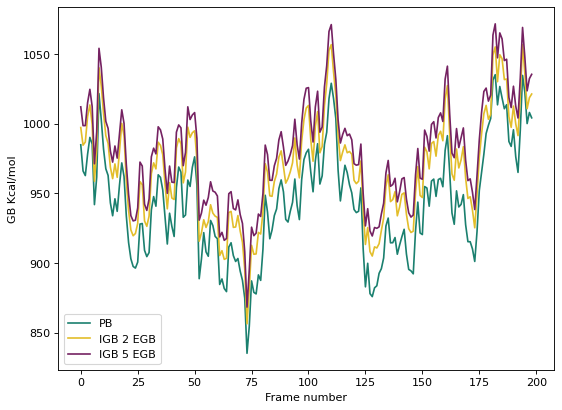

In [11]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='PB', color='#1b806f')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_2], label='IGB 2 EGB', color='#e3be2b')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_5], label='IGB 5 EGB', color='#752262')
plt.xlabel('Frame number')
plt.ylabel('GB Kcal/mol')
plt.legend()

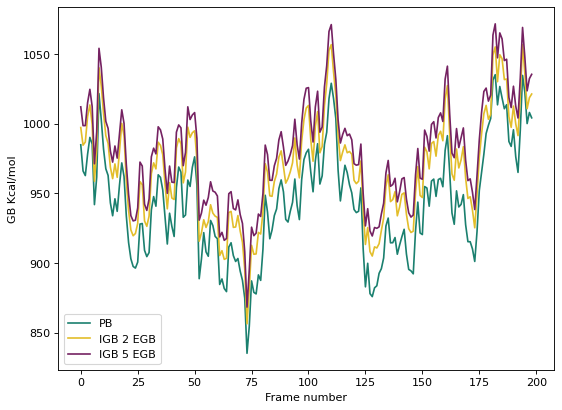

In [12]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='PB', color='#1b806f')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_2], label='IGB 2 EGB', color='#e3be2b')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_5], label='IGB 5 EGB', color='#752262')
plt.xlabel('Frame number')
plt.ylabel('GB Kcal/mol')
plt.legend()

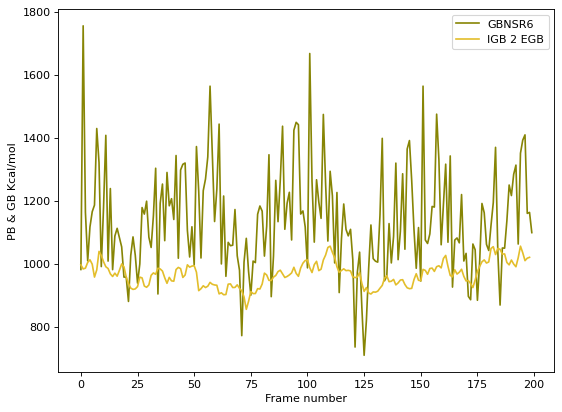

In [13]:
figure(figsize=(8, 6), dpi=80)
plt.plot([x[colm] for x in gbnsr6], label='GBNSR6', color='#878505')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_2], label='IGB 2 EGB', color='#e3be2b')
plt.xlabel('Frame number')
plt.ylabel('PB & GB Kcal/mol')
plt.legend()

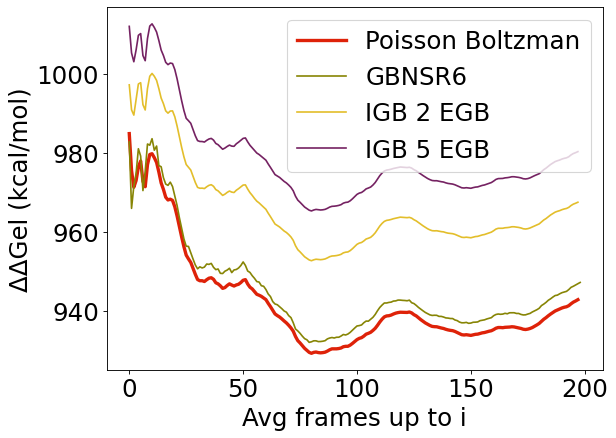

In [23]:
figure(figsize=(8, 6), dpi=80)
mmpbsa_epb = np.array([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa])
gbnsr6_egb = np.array([x[colm] for x in gbnsr6])
mmgbsa_2_egb = np.array([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_2])
mmgbsa_5_egb = np.array([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa_5])
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman', color='#de2209', linewidth=3)
plt.plot([gbnsr6_egb[:i].mean() for i in range(1, len(gbnsr6_egb))], label='GBNSR6', color='#878505')
plt.plot([mmgbsa_2_egb[:i].mean() for i in range(1, len(mmgbsa_2_egb))], label='IGB 2 EGB', color='#e3be2b')
plt.plot([mmgbsa_5_egb[:i].mean() for i in range(1, len(mmgbsa_2_egb))], label='IGB 5 EGB', color='#752262')
plt.xlabel('Avg frames up to i')
plt.ylabel('ΔΔGel (kcal/mol)')
plt.legend()

NameError: name 'mmgbsa' is not defined

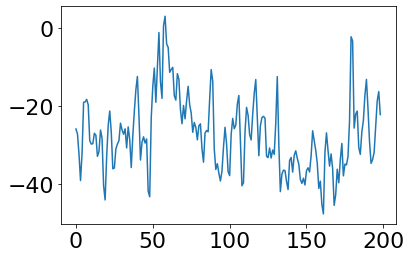

In [37]:
plt.plot([x['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] for x in mmpbsa], label='PB')
plt.plot([mmgbsa[i]['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] - \
          mmgbsa[i]['Differences (Complex - Receptor - Ligand)_EGB'] + gbnsr6[i][colm] for i in range(len(mmgbsa))], label='GBNSR6')

In [26]:
figure(figsize=(8, 6), dpi=80)
mmgbsa_epb = np.array([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa])
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman')
plt.plot([mmgbsa_epb[:i].mean() for i in range(1, len(mmgbsa_epb))], label='IGB 5 EGB')
plt.xlabel('Avg frames up to i')
plt.ylabel('Kcal/mol')
plt.legend()

NameError: name 'mmgbsa' is not defined

<Figure size 640x480 with 0 Axes>

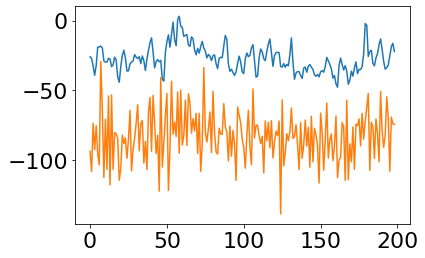

In [21]:
plt.plot([x['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] for x in mmpbsa], label='PB')
plt.plot([mmgbsa_2[i]['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] - \
          mmgbsa_2[i]['Differences (Complex - Receptor - Ligand)_EGB'] + gbnsr6[i][colm] for i in range(len(mmgbsa_2))], label='GBNSR6')

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman')
plt.plot([mmgbsa_epb[:i].mean() for i in range(1, len(mmgbsa_epb))], label='IGB 5 EGB')
plt.plot([gbnsr6_egb[:i].mean() for i in range(1, len(gbnsr6_egb))], label='GBNSR6')
plt.xlabel('Avg frames up to i')
plt.ylabel('Kcal/mol')
plt.legend()

In [ ]:
gbnsr6_acc = []
for i in range(len(gbnsr6)):
    new_dict = {}
    for kp in gbnsr6[0].keys():
        if kp == 'meta':
            continue
        k = kp
        k = k.replace('EELEC', 'EEL')
        k = k.replace('complex', 'Complex').replace('receptor', 'Receptor').replace('ligand', 'Ligand')
        new_dict[k] = np.array([gbnsr6[j][kp] for j in range(i + 1)]).mean()
    gbnsr6_acc.append(new_dict)

In [ ]:
# Timing comparison

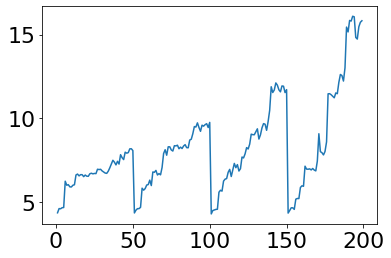

In [27]:
plt.plot(np.arange(1, 200), gbnsr6_time[:199], label='GBNSR6')

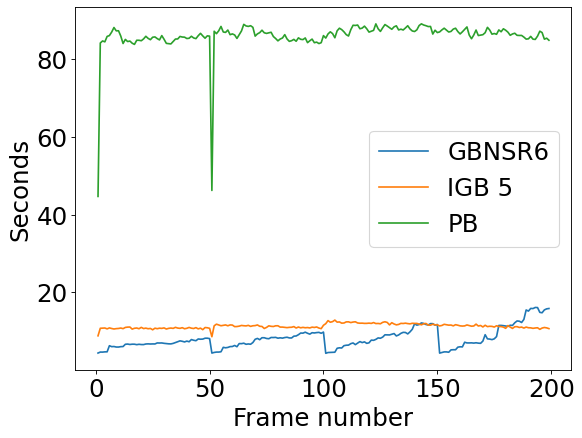

In [26]:
figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(1, 200), gbnsr6_time[:199], label='GBNSR6')
plt.plot(np.arange(1, 200),mmgbsa_time, label='IGB 5')
plt.plot(np.arange(1, 200),mmpbsa_time, label='PB')
plt.xticks([])
plt.xlabel('Frame number')
plt.ylabel('Seconds')
plt.legend()

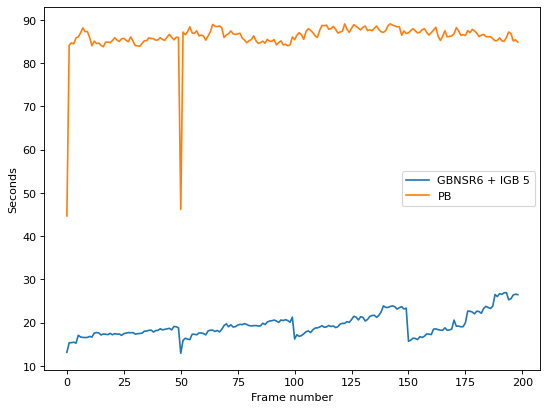

In [15]:
figure(figsize=(8, 6), dpi=80)
plt.plot(np.array(gbnsr6_time)[:199] + np.array(mmgbsa_time), label='GBNSR6 + IGB 5')
plt.plot(mmpbsa_time, label='PB')
plt.xlabel('Frame number')
plt.ylabel('Seconds')
plt.legend()

/tmp/ipykernel_55126/3180129528.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log([np.sum(gbnsr6_time[:i]) for i in range(len(gbnsr6_time))]), label='GBNSR6')
/tmp/ipykernel_55126/3180129528.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log([np.sum(mmgbsa_time[:i]) for i in range(len(mmgbsa_time))]), label='IGB 5')
/tmp/ipykernel_55126/3180129528.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))]), label='PB')


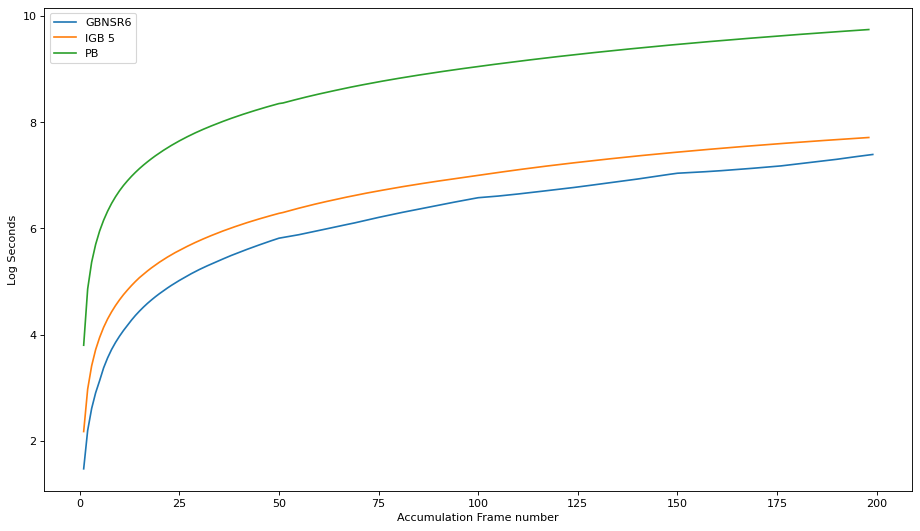

In [18]:
figure(figsize=(14, 8), dpi=80)
plt.plot(np.log([np.sum(gbnsr6_time[:i]) for i in range(len(gbnsr6_time))]), label='GBNSR6')
plt.plot(np.log([np.sum(mmgbsa_time[:i]) for i in range(len(mmgbsa_time))]), label='IGB 5')
plt.plot(np.log([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))]), label='PB')
plt.xlabel('Accumulation Frame number')
plt.ylabel('Log Seconds')
plt.legend()

In [13]:
gbnsr6_time_np = np.array(gbnsr6_time)
mmgbsa_time_np = np.array(mmgbsa_time)

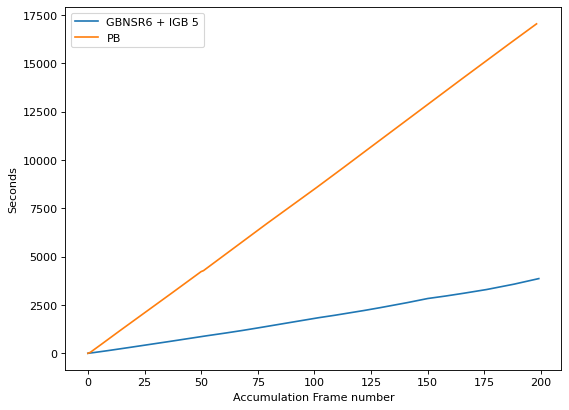

In [14]:
figure(figsize=(8, 6), dpi=80)
plt.plot([np.sum(gbnsr6_time_np[:i] + mmgbsa_time_np[:i]) for i in range(len(gbnsr6_time))], label='GBNSR6 + IGB 5')
plt.plot([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))], label='PB')
plt.xlabel('Accumulation Frame number')
plt.ylabel('Seconds')
plt.legend()

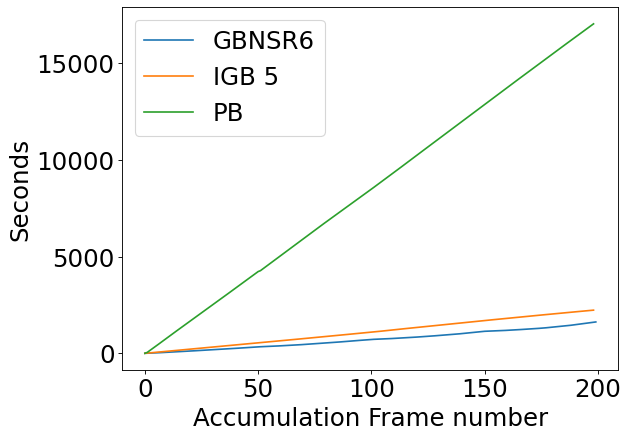

In [22]:
figure(figsize=(8, 6), dpi=80)
plt.plot([np.sum(gbnsr6_time[:i]) for i in range(len(gbnsr6_time))], label='GBNSR6')
plt.plot([np.sum(mmgbsa_time[:i]) for i in range(len(mmgbsa_time))], label='IGB 5')
plt.plot([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))], label='PB')
plt.xlabel('Accumulation Frame number')
plt.ylabel('Seconds')
plt.legend()

In [23]:
gbnsr6_time_np = np.array(gbnsr6_time)
mmgbsa_time_np = np.array(mmgbsa_time)

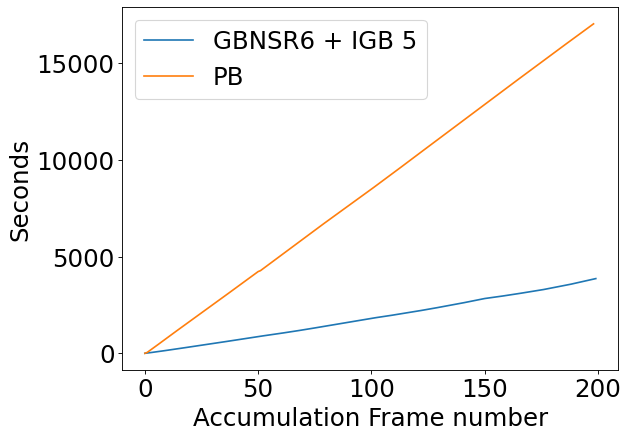

In [24]:
figure(figsize=(8, 6), dpi=80)
plt.plot([np.sum(gbnsr6_time_np[:i] + mmgbsa_time_np[:i]) for i in range(len(gbnsr6_time))], label='GBNSR6 + IGB 5')
plt.plot([np.sum(mmpbsa_time[:i]) for i in range(len(mmpbsa_time))], label='PB')
plt.xlabel('Accumulation Frame number')
plt.ylabel('Seconds')
plt.legend()

# Numerical assessments

In [75]:
gb_col = 'Differences (Complex - Receptor - Ligand)_EGB'
gbnsr6_col = colm
pb_col = 'Differences (Complex - Receptor - Ligand)_EPB'

In [82]:
pb_arr = np.array([x[pb_col] for x in mmpbsa])
gb_2_arr = np.array([x[gb_col] for x in mmgbsa_2])
gb_5_arr = np.array([x[gb_col] for x in mmgbsa_5])
gbnsr6_arr = np.array([x[gbnsr6_col] for x in gbnsr6])[:199]

In [86]:
def rmse(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.mean((a-b)**2))

In [84]:
print('RMSE PB & IGB 2 ', rmse(pb_arr, gb_2_arr))
print('RMSE PB & IGB 5 ', rmse(pb_arr, gb_5_arr))
print('RMSE PB & GBNSR6 ', rmse(gbnsr6_arr, pb_arr))
print('RMSE IGB 2 & GBNSR6 ', rmse(gbnsr6_arr, gb_2_arr))

RMSE PB & IGB 2  25.382587697850973
RMSE PB & IGB 5  37.99959440039422
RMSE PB & GBNSR6  17.940594475468647
RMSE IGB 2 & GBNSR6  26.73645509349705


# Time comparison

In [89]:
gb_gbnsr6 = np.array(mmgbsa_time) + np.array(gbnsr6_time)[:199]

In [91]:
print('Mean PB ', np.mean(mmpbsa_time))
print('Mean IGB 5 + GBNSR6 ', np.mean(gb_gbnsr6))

Mean PB  86.04927846774385
Mean IGB 5 + GBNSR6  19.417366528630854
